In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
import sys
print(sys.version)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


In [89]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt  #for plotting the results

In [90]:
# loading the training dataset
fashion_mnist_train=('../input/fashionmnist/fashion-mnist_train.csv')
df=pd.read_csv(fashion_mnist_train)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
train_labels=df.loc[:,'label']
print(train_labels)
print("type= ",type(train_labels))
print(train_labels.shape)
print(train_labels.size)

train_images_flat=df.iloc[:,1:]
train_images_flat=train_images_flat.T
print(train_images_flat)
print(train_images_flat.shape)

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
type=  <class 'pandas.core.series.Series'>
(60000,)
60000
          0      1      2      3      4      5      6      7      8      \
pixel1        0      0      0      0      0      0      0      0      0   
pixel2        0      0      0      0      0      0      0      0      0   
pixel3        0      0      0      0      0      0      0      0      0   
pixel4        0      0      0      1      0      5      0      0      0   
pixel5        0      0      0      2      0      4      0      0      0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
pixel780      0      0      0      1      0      7      0      0      0   
pixel781      0      0      0      0      0      5      0      0      0   
pixel782      0      0      0      0      0      0      0      0      0   
pixel783      0      0      0 

In [92]:
m,n=df.shape
print(m,n)  #m is the no of labeled examples and n is the 784 pixels with 0th column label column

60000 785


In [93]:
fashion_mnist_test=('../input/fashionmnist/fashion-mnist_test.csv')
df1=pd.read_csv(fashion_mnist_test)
df1.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As is evident from the dataset that rows contain the differnt labeled exaples and the columns contain the info of each pixel of the particular image of the row

In [142]:
test_labels=df1.loc[:,'label']
print(test_labels)
test_images=df1.iloc[:,1:]
test_images_flat=test_images.T
print(test_images_flat)
print(test_images_flat.shape)

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64
          0     1     2     3     4     5     6     7     8     9     ...  \
pixel1       0     0     0     0     0     0     0     0     0     0  ...   
pixel2       0     0     0     0     0     0     0     0     0     0  ...   
pixel3       0     0     0     0     0     0     0     0     0     0  ...   
pixel4       0     0     0     0     0     0     0     0     0     0  ...   
pixel5       0     0     0     0     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
pixel780     0     0    53   224     0     0     0     1     0     0  ...   
pixel781     0     0    31   222     0     0     0     0     0     0  ...   
pixel782     0     0     0    56     0     0     0     0     0     0  ...   
pixel783     0     0     0     0     0     0     0     0     0     0  ...   
pi

In [143]:
X = train_images_flat/255
X_test = test_images_flat/255

In [96]:
#activation function (sigmoid)
#to introduce the non linearity in the output so as to train the model well for the complex relations
def sigmoid_der(t):
    return sigmoid_activation(t)*(1-sigmoid_activation(t))

In [99]:
def one_hot(row_vector, no_classes):
    row_vector=row_vector.to_numpy()
    one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
    return one_hot_vector.T

In [100]:
C = train_labels.max()+1
print(f"No. of Classes={C}")
Y_hot = one_hot(train_labels,no_classes=C)
Y_test_hot = one_hot(test_labels,no_classes=C)
print(Y_hot.shape) #Y_hot.shape is (C,m)
print(Y_test_hot.shape) #Y_hot.shape is (C,m)

No. of Classes=10
(10, 60000)
(10, 10000)


In [101]:
def initialize(n_x,C):
#     global W,b
    W = np.random.randn(train_images_flat.shape[0], C)*0.001 # W.shape is (n_x,1)
    b = 0 #np.zeros((1,m)) #b.shape is (1,m)
    return W,b

In [102]:
# print(x_train.shape[0])

In [103]:
def softmax_fun(t):
    t=np.float128(t) #for solving the probem of large exp(t)
    return np.exp(t)/np.sum(np.exp(t))

In [104]:
def forward(W, X, b):
#     global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    A = softmax(Z)  # A.shape is (C,m)
    return Z, A

In [105]:
def cost(A, Y_hot):
#     global L,J
# Calculate Loss
    L = -np.sum(Y_hot*np.log(A), keepdims=True, axis=0) # L.shape is (1,m)   
    #calculate Cost
    J = np.sum(L, keepdims=True, axis=1)*(1/m) # J.shape is (1,1) 
    
    return J

In [106]:
# deivatives
def backward(X, Y_hot, A):
#     global dZ, dW, db
    #dJ/dZ
    dZ = A-Y_hot  # dZ.shape is (C,m)   '''BROADCASTING GOING ON HERE'''

    #dJ/dW = sum(dL/dW)/m  which is equivalent to np.dot(X,dZ.T)/m
    '''
    dLdW = X*dZ  # dLdW.shape is (n_x, m)
    dW = np.sum(dLdW, keepdims=True, axis=1)/m  #dW.shape is (n_x,1) [same as W.shape]
    '''
    dW = np.dot(X, dZ.T) / m
    #dJ/db
    db = np.sum(dZ, keepdims=True, axis=1)/m  # db.shape = (1,1)
    
    return dW, db

In [107]:
iterations=2000

In [108]:
#optimise
def optimize(W, X, b, Y_hot, alpha, iterations):
#     global costs
    costs=[]
    for i in range(iterations):
        Z, A = forward(W, X, b)
        if i%5 ==0:
            J = cost(A, Y_hot)
            costs.append(J)
            print(f'Cost at {i}th loop = {J}')
        dW, db = backward(X, Y_hot, A)
        W = W - alpha*dW
        b = b - alpha*db
    return W, b, costs

In [109]:
def model(X, Y_hot, C, alpha, iterations):
    W, b = initialize(X.shape[1], C)
    res_W, res_b, costs = optimize(W, X, b, Y_hot, alpha, iterations)
    plt.plot(np.arange(0,iterations,5), np.array(costs).reshape(len(costs),1))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    return res_W, res_b, costs

In [110]:
def predict(X_test, Y_test_hot, res_W, res_b):
    Z_test, A_test = forward(res_W, X_test, res_b)
    J_test = cost(A_test, Y_test_hot)
    O_test = (np.max(A_test,axis=0) == A_test).T * np.array([0,1,2,3,4,5,6,7,8,9]).T
    predicted_labels = np.sum(O_test,axis=1)
    print(f'Accuracy : {100 - np.mean(np.abs(A_test - Y_test_hot))*100}')
    print(f'Cost : {J_test}')
    return predicted_labels

Cost at 0th loop = [[2.30387098]]
Cost at 5th loop = [[2.19653715]]
Cost at 10th loop = [[2.10884785]]
Cost at 15th loop = [[2.03191853]]
Cost at 20th loop = [[1.96254137]]
Cost at 25th loop = [[1.89927332]]
Cost at 30th loop = [[1.84127505]]
Cost at 35th loop = [[1.78794445]]
Cost at 40th loop = [[1.73879368]]
Cost at 45th loop = [[1.69340429]]
Cost at 50th loop = [[1.6514085]]
Cost at 55th loop = [[1.61247983]]
Cost at 60th loop = [[1.5763272]]
Cost at 65th loop = [[1.54269061]]
Cost at 70th loop = [[1.51133761]]
Cost at 75th loop = [[1.48206024]]
Cost at 80th loop = [[1.45467235]]
Cost at 85th loop = [[1.42900717]]
Cost at 90th loop = [[1.40491524]]
Cost at 95th loop = [[1.38226243]]
Cost at 100th loop = [[1.36092825]]
Cost at 105th loop = [[1.34080437]]
Cost at 110th loop = [[1.32179321]]
Cost at 115th loop = [[1.30380681]]
Cost at 120th loop = [[1.2867657]]
Cost at 125th loop = [[1.27059802]]
Cost at 130th loop = [[1.25523868]]
Cost at 135th loop = [[1.24062859]]
Cost at 140th loo

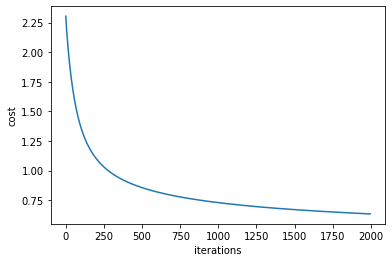

In [111]:
res_W, res_b, costs = model(X, Y_hot, C, alpha=0.009, iterations=2000)

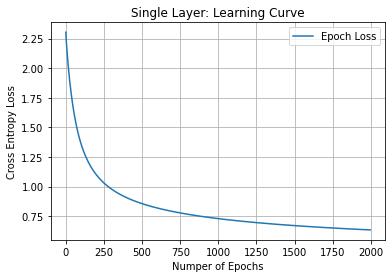

In [112]:
plt.plot(np.arange(0,iterations,5), np.array(costs).reshape(len(costs),1), label="Epoch Loss")
plt.grid()
plt.title("Single Layer: Learning Curve")
plt.legend()
plt.xlabel("Numper of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.savefig("SingleCost.jpeg")
plt.show()

In [113]:
predicted_labels = predict(X, Y_hot, res_W, res_b)

Accuracy : 92.68241609901092
Cost : [[0.63296693]]


In [114]:
print(f'{np.sum(predicted_labels==train_labels)} images correctly labeled out of {train_labels.shape[0]} for Train Set')

47916 images correctly labeled out of 60000 for Train Set


In [115]:
predicted_labels = predict(X_test, Y_test_hot, res_W, res_b)

Accuracy : 92.71123755418566
Cost : [[0.10615647]]


In [116]:
print(f'{np.sum(predicted_labels==test_labels)} images correctly labeled out of {test_labels.shape[0]} for Test Set')

8007 images correctly labeled out of 10000 for Test Set


In [117]:
print(f'{np.sum(predicted_labels==test_labels)} images correctly labeled out of {test_labels.shape[0]} for Test Set')

8007 images correctly labeled out of 10000 for Test Set


In [136]:
print(test_images.to_numpy()[0].reshape(28,28,).shape)

(28, 28)


In [146]:
test_image_labels=['T-shirt/top',' Trouser','Pullover',' Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

The image no. is 9 and my Model predicts Ankle boot


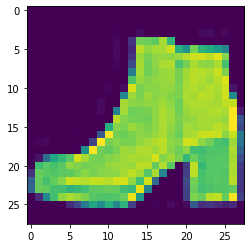

In [153]:
image = 55  # 0-9999
plt.imshow(test_images.to_numpy()[image].reshape(28,28,))
print(f'The image no. is {test_labels[image]} and my Model predicts {test_image_labels[predicted_labels[image]]}')

In [148]:
pd.DataFrame([cost[0][0] for cost in costs], columns=['Cost'], index=np.arange(0,iterations,5)).to_csv('Cost.csv')
pd.DataFrame(res_W).to_csv('res_W.csv', header=None,index=None)
pd.DataFrame(res_b).to_csv('res_b.csv', header=None,index=None)

In [149]:
res_W = pd.read_csv('res_W.csv', header=None, index_col=None).to_numpy()
res_W.shape

(784, 10)

In [154]:
res_b = pd.read_csv('res_b.csv', header=None, index_col=None).to_numpy()
res_b.shape

(10, 1)